In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

####A.	For the Dataset given below. Write a code to remove Hyphen (-) and change the datatype of the column as numeric? 

![Title](EDA_Datasets/Question1a.png)

In [ ]:
#df.population_male.replace('-',np.nan).astype('int64')

#### 1.B)For the Dataset given below. Write a code to Convert 'N' Category  as 0 and 'P' category  as 1 for the Shortlisted Column ? 
![Image of Yaktocat](EDA_Datasets/Question1b.png)

In [ ]:
#df['Shortlisted'] = df['Shortlisted'].map({'N' : 0, 'P': 1})

#### 1.C)For the Dataset given below. Create a calculated field Male_Ratio which Calculates the ratio of Male Population to the total population ? (2 Mark)
![Image of Yaktocat](EDA_Datasets/Question1c.png)

## Read the Dataset German Credit Data.csv

#### 2.A) Find out out the loan defaulter count and non defaulter count and plot it.


In [7]:
df = pd.read_csv('German Credit Data.csv')
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [5]:
df.shape

(1000, 14)

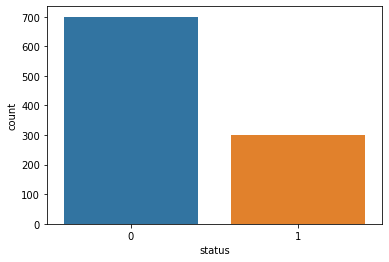

In [8]:
sns.countplot(x="status", data=df)

#### 2.B) Split the Dataset into Train and Test. Also give us the reason behind your split 
Assume Status Column to be the Target variable

In [9]:
X = df.drop(['status'],axis=1)
y= df.status

In [11]:
X.shape

(1000,)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state=90)

In [36]:
X_train.shape

(700, 13)

In [37]:
X_train.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job
204,A14,12,A34,1495,A61,A75,4,A93,1,38,A143,2,A172
32,A12,18,A32,5866,A62,A73,2,A93,2,30,A143,2,A173
567,A14,24,A34,2578,A64,A75,2,A93,2,34,A143,1,A173
307,A11,12,A32,727,A62,A72,4,A94,3,33,A143,1,A172
181,A12,36,A33,4455,A61,A73,2,A91,2,30,A142,2,A174


In [14]:
X_test.shape

(200, 13)

### Q3. 

#### 3.A) Draw the Count Plot for 'Checkin_acc' Column? 

In [94]:
df = pd.read_csv('German Credit Data.csv')

In [95]:
df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


#### 3.B) How does the distribution of 'Age' column look like and perform the test of Normality? 

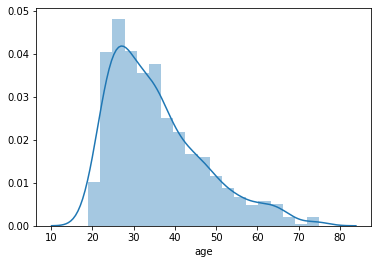

In [38]:
sns.distplot( df['age'])

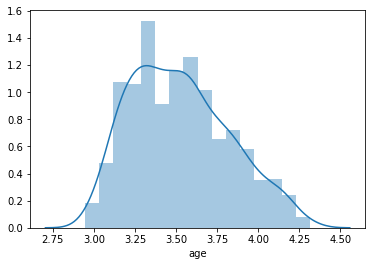

In [40]:
sns.distplot( np.log(df['age']))

In [41]:
stats.shapiro(np.log(df['age']))

(0.9730614423751831, 1.1518377397712332e-12)

In [39]:
#H0: Data is normal
#H1: Data is not normal


stats.shapiro(df['age'])

# if p value < alpha -> Reject Null
# If p value > alpha -> Fail to Reject Null


(0.9174706339836121, 6.380969644587929e-23)

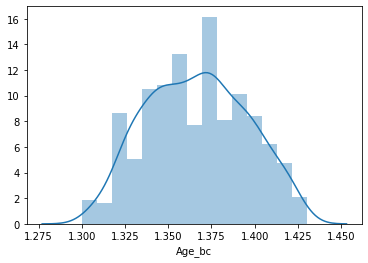

In [43]:
df['Age_bc'],lmda= stats.boxcox(df['age'])
sns.distplot(df['Age_bc'])

In [45]:
stats.shapiro(df['Age_bc'])

(0.9842872619628906, 6.744946379200201e-09)

#### 3.C) How do you handle object variables? Write down the code for encoding? 

### Q4. Read the Dataset bank.csv

In [48]:
df = pd.read_csv('bank.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4518 non-null object
marital              4521 non-null object
education            4509 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4514 non-null float64
previous-campaign    4521 non-null int64
subscribed           4521 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 388.6+ KB


In [49]:
df.isnull().sum()

age                   0
job                   3
marital               0
education            12
default               0
balance               0
housing-loan          0
personal-loan         0
current-campaign      7
previous-campaign     0
subscribed            0
dtype: int64

In [51]:
df['job'].value_counts()

management       968
blue-collar      944
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [52]:
df['education'].value_counts()

secondary    2300
tertiary     1345
primary       677
unknown       187
Name: education, dtype: int64

In [53]:
df['current-campaign'].value_counts()

1.0     1731
2.0     1262
3.0      556
4.0      325
5.0      167
6.0      155
7.0       75
8.0       56
9.0       30
10.0      27
11.0      22
12.0      21
13.0      17
14.0      10
15.0       9
16.0       8
17.0       7
18.0       7
25.0       4
19.0       3
24.0       3
28.0       3
20.0       3
32.0       2
21.0       2
22.0       2
23.0       2
44.0       1
29.0       1
50.0       1
30.0       1
31.0       1
Name: current-campaign, dtype: int64

#### 4.A) Check for Null Values? 

#### 4.B) Treat the Null values and also the reason for the method used

#### 4.C) Check the spellings in the dataframe and treat them accordingly? 

In [54]:
df['marital'].value_counts()

married     2796
single      1195
divorced     528
marri          1
songle         1
Name: marital, dtype: int64

### Q5. Read the Dataset Beer.csv

#### 5.A) Check for outliers and how to treat them? 

In [ ]:
### methods to check - Boxplot, density plot

## methods to treat - zscore, IQR

In [57]:
data = pd.read_csv('beer.csv')
data.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Hein@#eken,152,11,5.0,0.77


{'whiskers': [<matplotlib.lines.Line2D at 0x22513b3e908>,
 'caps': [<matplotlib.lines.Line2D at 0x22513b43a48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22513b36d88>],
 'medians': [<matplotlib.lines.Line2D at 0x22513b45b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x22513b45c08>],
 'means': []}

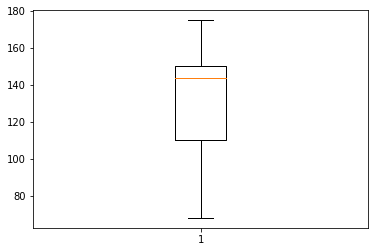

In [58]:
plt.boxplot(data['calories'])

{'whiskers': [<matplotlib.lines.Line2D at 0x22513ba4e48>,
 'caps': [<matplotlib.lines.Line2D at 0x22513ba8e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x22513ba4388>],
 'medians': [<matplotlib.lines.Line2D at 0x22513bacd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22513bace88>],
 'means': []}

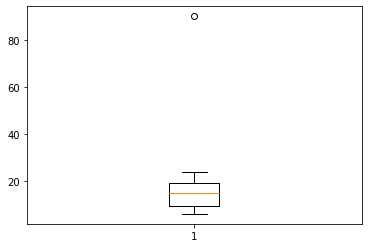

In [59]:
plt.boxplot(data['sodium'])

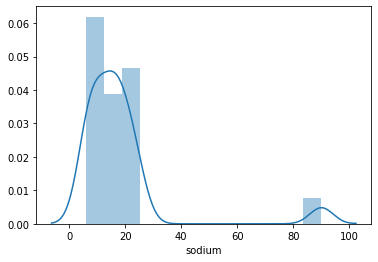

In [60]:
sns.distplot(data['sodium'])

### Q6. Read the Dataset IPL.csv

In [62]:
ipl_df = pd.read_csv('IPL.csv')
df4=ipl_df

#### 6.A) Which player got the maximum premium (Price) on the base price and What is the average SOLD PRICE for each 'age' category? 
Hint : Premium = Sold Price - Base Price

In [64]:
df4['Premium'] = df4['SOLD PRICE'] - df4['BASE PRICE']
df4[df4['Premium'] == df4['Premium'].max()][['PLAYER NAME','Premium']]

,PLAYER NAME,Premium
50,"Kohli, V",1650000


In [66]:
df4.groupby('AGE')['SOLD PRICE'].mean()

AGE
1    720250.000000
2    484534.883721
3    520178.571429
Name: SOLD PRICE, dtype: float64

#### 6.B) What are the outliers in Sold Price? Filter out the outliers and display the Name of the player, sold price and their Playing role and Who are the highest sold players? 

{'whiskers': [<matplotlib.lines.Line2D at 0x22513c5d408>,
 'caps': [<matplotlib.lines.Line2D at 0x22513ce6f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x22513ce1e88>],
 'medians': [<matplotlib.lines.Line2D at 0x22513cebf08>],
 'fliers': [<matplotlib.lines.Line2D at 0x22513cf0f08>],
 'means': []}

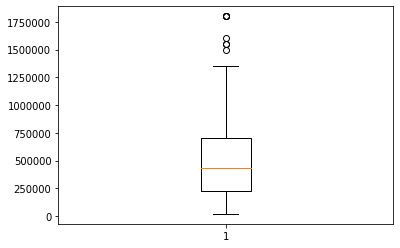

In [67]:
plt.boxplot(df4['SOLD PRICE'])

In [69]:
q1 = df4['SOLD PRICE'].quantile(0.25)
q2 = df4['SOLD PRICE'].quantile(0.50)
q3 = df4['SOLD PRICE'].quantile(0.75)
IQR = q3-q1

In [70]:
UL = q3 + 1.5 * IQR
print(UL)

1412500.0


In [71]:
df4[df4['SOLD PRICE']>UL]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,Premium
15,16,"Dhoni, MS",2,IND,CSK,W. Keeper,3509,0,6773,88.19,...,64,0,0,0.00,0.00,0.00,2008,400000,1500000,1100000
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,2,105,2,52.50,9.55,33.00,2009,950000,1550000,600000
50,51,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,...,49,345,4,86.25,8.84,58.50,2011,150000,1800000,1650000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,30,215,7,30.71,7.41,24.86,2009,1350000,1550000,200000
93,94,"Sehwag, V",2,IND,DD,Batsman,8178,40,8090,104.68,...,79,226,6,37.67,10.56,21.67,2011,400000,1800000,1400000
111,112,"Tendulkar, SR",3,IND,MI,Batsman,15470,45,18426,86.23,...,24,58,0,0.00,9.67,0.00,2011,400000,1800000,1400000
113,114,"Tiwary, SS",1,IND,MI+,Batsman,0,0,49,87.50,...,32,0,0,0.00,0.00,0.00,2011,100000,1600000,1500000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,67,569,23,24.74,7.02,21.13,2011,400000,1800000,1400000


### Q7. Read the Dataset bollywood.csv

In [95]:
data = pd.read_csv('bollywood.csv')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
SlNo                   149 non-null int64
Release Date           149 non-null object
MovieName              149 non-null object
ReleaseTime            149 non-null object
Genre                  149 non-null object
Budget                 149 non-null int64
BoxOfficeCollection    149 non-null float64
YoutubeViews           149 non-null int64
YoutubeLikes           149 non-null int64
YoutubeDislikes        149 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [74]:
data['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [75]:
data['ReleaseTime'].value_counts()

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

In [79]:
a = pd.crosstab(data.Genre,data.ReleaseTime)
print(a)

ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2


In [80]:
from scipy.stats import chi2_contingency
chi2_contingency(a)

(12.528516576379323,
 0.8187865259395746,
 18,
 array([[ 3.99328859,  4.22818792,  3.52348993, 23.25503356],
        [ 2.39597315,  2.53691275,  2.11409396, 13.95302013],
        [ 0.34228188,  0.36241611,  0.30201342,  1.99328859],
        [ 4.10738255,  4.34899329,  3.62416107, 23.91946309],
        [ 2.85234899,  3.02013423,  2.51677852, 16.61073826],
        [ 2.96644295,  3.1409396 ,  2.61744966, 17.27516779],
        [ 0.34228188,  0.36241611,  0.30201342,  1.99328859]]))

In [ ]:
# H0 : There is NO relationship between Genre and release time
# H1: There is a relationship between Genre and release time


# if p value < alpha -> Reject Null
# If p value > alpha -> Fail to Reject Null


# now p value is 0.81 > 0.05, Fail to reject null

#### 7.A) Is there any relationship between Genre and Release time? 

#### 7.B) Which movie got the highest profit and which genre of movie has the highest budget? 

#### 7.C) Which year has the highest box office collection   

In [92]:
data['year'] = pd.DatetimeIndex(data['Release Date']).year
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,year
0,1,18-04-2014,2 States,LW,Romance,36,104.00,8576361,26622,2527,2014
1,2,04-01-2013,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,2013
2,3,18-07-2014,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,2014
3,4,04-01-2013,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013
4,5,04-07-2014,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,2014


In [98]:
data['Release Date']= pd.to_datetime(data['Release Date'])
data['Release Date'].dt.year

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: Release Date, Length: 149, dtype: int64

### Q8. Read the Dataset Glaxo.csv

#### 8.A) Create new columns by splitting the date column into Day, Month and Year? 

#### 8.B) What was the highest daily swing in the price? (5 Marks) Hint: Price High - Price Low = Daily Swing

Note : Daily Swing = High - Low 

#### 8.C) Check the distribution of the close price? What type of transformation can be applied? 

In [100]:
data = pd.read_csv('GLAXO.csv')

print(data.shape)

(1739, 8)


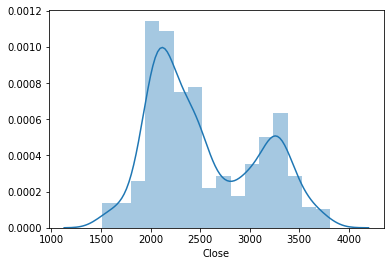

In [101]:
sns.distplot( data['Close'])

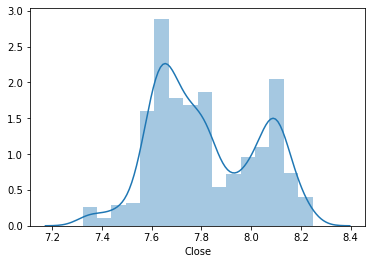

In [103]:
sns.distplot(np.log(data['Close']))

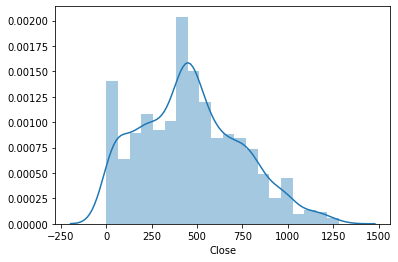

In [104]:
trans = abs(data['Close'] - np.mean(data['Close']))
sns.distplot(trans)